In [1]:
!pip install shap



  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/a4/69/d7fa1ed3a315d3e63f4d57f6c9e4523fba4f179fb5fd1dee6b2085491195/shap-0.44.0-cp39-cp39-win_amd64.whl.metadata


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
distributed 2021.10.0 requires dask==2021.10.0, but you have dask 2022.10.2 which is incompatible.
jax 0.4.11 requires numpy>=1.21, but you have numpy 1.20.3 which is incompatible.
pytest 6.2.4 requires pluggy<1.0.0a1,>=0.12, but you have pluggy 1.3.0 which is incompatible.
rasa 3.6.10 r

  Obtaining dependency information for packaging>20.9 from https://files.pythonhosted.org/packages/ec/1a/610693ac4ee14fcdf2d9bf3c493370e4f2ef7ae2e19217d7a237ff42367d/packaging-23.2-py3-none-any.whl.metadata
     ---------------------------------------- 13.7/13.7 MB 2.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/ac/a0/8b8e5495ba759f99ec99d90973d481e8a6682c320fcf875b4f084591f4d8/scipy-1.11.4-cp39-cp39-win_amd64.whl.metadata
     -------------------------------------- 60.4/60.4 kB 533.6 kB/s eta 0:00:00
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/e9/20/2d0561ab54d857365926c5b53538369a7b8d6ccbffaca509305b074028cd/scipy-1.11.2-cp39-cp39-win_amd64.whl.metadata
     -------------------------------------- 59.1/59.1 kB 626.5 kB/s eta 0:00:00
  Obt

[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

customer = pd.read_csv("C:/Users/KP/Downloads/customer_churn.csv")
customer.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [20]:
customer.describe()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [21]:
customer.isnull().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [5]:
!python.exe -m pip install --upgrade pip

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [6]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       819
           1       0.78      0.83      0.80       126

    accuracy                           0.95       945
   macro avg       0.88      0.90      0.89       945
weighted avg       0.95      0.95      0.95       945



In [7]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

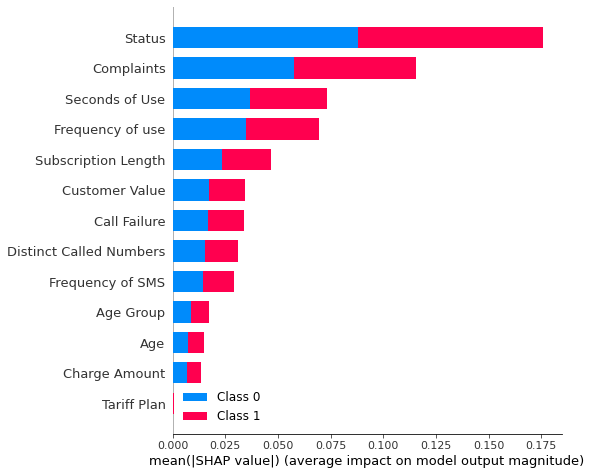

In [8]:
shap.summary_plot(shap_values, X_test)

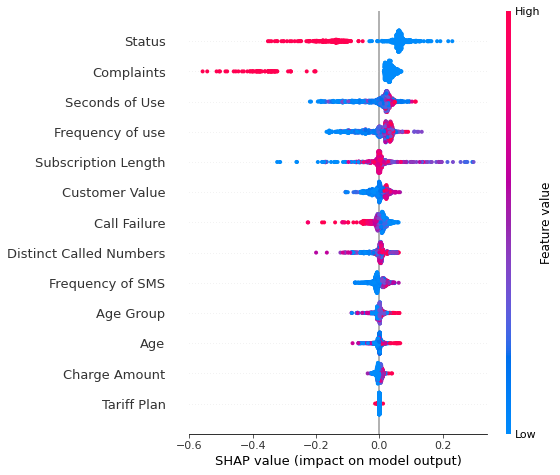

In [9]:
shap.summary_plot(shap_values[0], X_test)

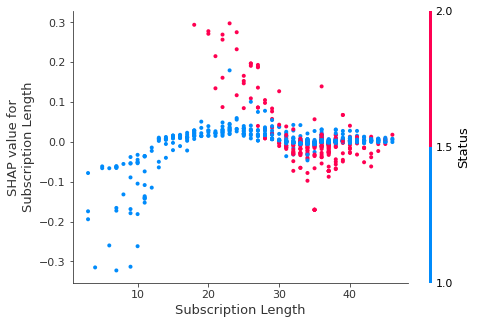

In [19]:
shap.dependence_plot("Subscription Length", shap_values[0], X_test,interaction_index="Status")

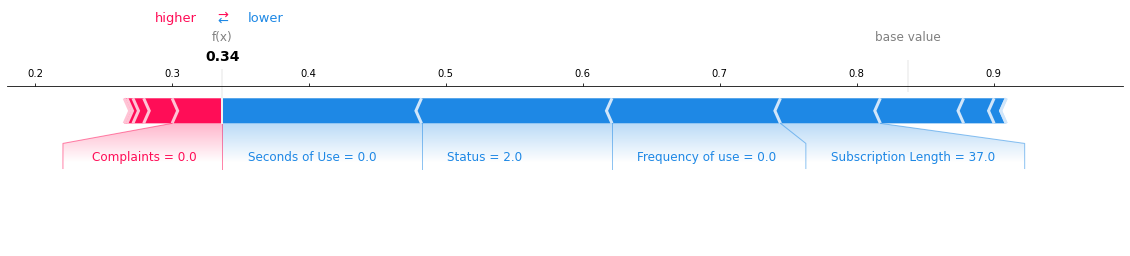

In [11]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

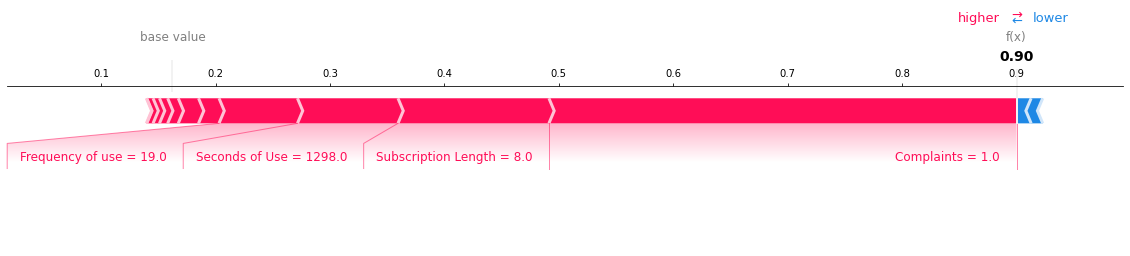

In [12]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

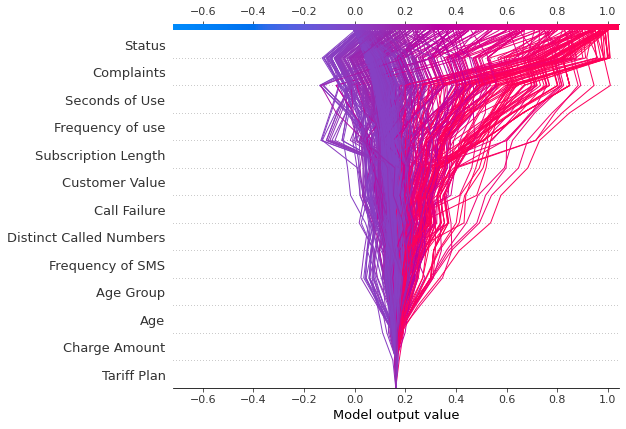

In [13]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)
#Plot for target value “1”


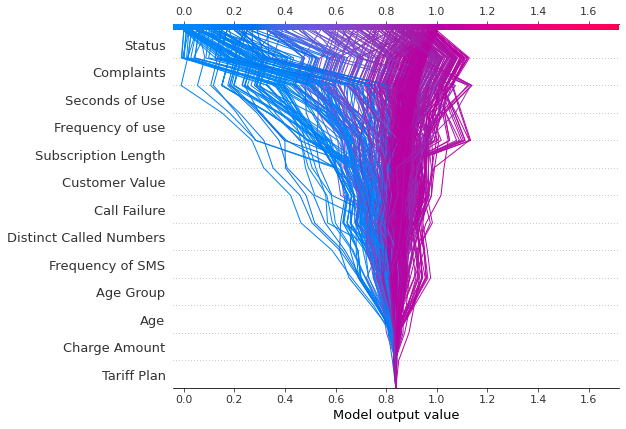

In [14]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.columns)
#Plot for target value “0”
